#    TP03: Régression logistique

 La ***régression logistique*** est une autre technique supervisé utilisé en machine learning. C'est la méthode de classification pour les problèmes avec deux classes(0/1).
 
 ## I-Algorithm du Gradient de descent
 
 -***Hypothèses***: $h_\theta(x)= \frac{1}{1+\exp(-\theta^Tx)}$
 
 $h_\theta(x)> 0,5 $  quand la classe (étiquette) vaut $Y=1$.
    
$h_\theta(x) < 0,5$  quand la classe (étiquette) vaut $Y=0$.
 
 ***Paramètres du model***: $\theta$ avec $m$ examples, $n $ variables
 
***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
***Objectif***: Trouver les meilleurs paramètres $\theta$  revient à minimiser  la fonction du coût.
		$	\min_{\theta}J(\theta)$	
		
		
***Algorithme du Gradient de descent***: $ \theta_j=\theta_j-\alpha	\frac{1}{m}\sum_{i=0}^{m} (h_\theta(x(i))-y(i))x_j(i)$


### 1. Recuperation des données
#### ***Q1***
   -utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer deux classes puis visualiser les deux classes comme suivants:
*   rouge: y=0
*   blue: y=1
<img src="log.png" style="with:150px;height:280px"/>

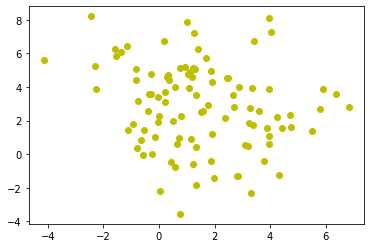

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2,random_state=0)
y = y.reshape((100,1))
X= np.concatenate((X,np.ones((100,1))),axis=1)
plt.scatter(X[:,0],X[:,1],c='y')
plt.show()

#### ***Q2***   
          -a)Corriger les dimentions avec np.reshape
      
          -b)Créez la matrice X
          
          -c) Créez le vecteur $\theta$ (initialisé avec des coefficients nuls)

### 2. Implémentation du modèle et évaluation
 ####  ***Q1***
 
       

 a) Implémenter la ***fonction sigmoid*** $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$
 
 b) Ecrire la ***Fonction du coût***:$J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
 c) Ecrire un script qui définit la fonction du gradiant $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 
 d) Implementer la descente de gradient en utilisant de gradiant:
$$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$
 
 e) Trouver les valeurs de $\theta$ pour un learning rate $\alpha=0.1$ et un nombre d'itérations de $150$

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
def coef_correlation(x,y):
    m = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - m*m_y*m_x
    SS_xx = np.sqrt((np.sum(x*x) - m*m_x*m_x)*(np.sum(y*y) - m*m_y*m_y))
    return  SS_xy/SS_xx 

 ####  ***Q2***
 
 a) Evaluer le modèle en calculant le coefficient de corrélation
 
 b) Tracer la courbe d'apprantissage

In [ ]:
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(sigmoid(X,theta)-y)
        

In [ ]:
def gradiant_descent(X,y,theta,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        return theta,cost_history

### 3. Prédiction

A quelle classe apartient les deux points suivants: x1=(1,5); x2(3,1) 

## II- Utilisation des modules python
### 1. Récuperation des données
Les données sont stocker dans le fichier banking.csv. Ce dataset contient des information collecter par un centre d'appel pour savoir si un client souscrira (1/0) à un dépôt à terme (variable y) dans une baque.

1-Recuperer les données de ce fichier dans un DataFrame data

2-Afficher les 10 premiere ligne de ce dataframe

3-Afficher le nombre de client par class (1/0)

In [72]:
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
data = pd.read_csv('banking.csv')
data.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [73]:
notRegester, Regester = data['y'].value_counts()
print(f"Number of client regesters is : {Regester}")
print(f"Number of client not regesters is : {notRegester}")

Number of client regesters is : 4640
Number of client not regesters is : 36548


### 2- Entrainement et test du modèle
Dans un premier lieux, nous allons utiliser comme critères de classifiction suivants:
"age": l'age du client
"emp_var_rate": employment variation rate
"cons_conf_idx": consumer confidence index

1- Creer deux numpy array X et y

X: les trois colonne "age","emp_var_rate" et "cons_conf_idx"

y: "y"

2- Nous allons utiliser **80%** du dataSet pour l'entrainement et **20%** pour le teste du modèle. utiliser la méthode **train_test_split()** du module **sklearn.model_selection** pour créer ces deux sous ensembles (X_train,X_test,y_train,y_test).

3- Creer un objet **LogisticRegression** du module **sklearn.linear_model** et utiliser **(X_train,y_train)** pour entrainer le model à l'aide la méthode **fit()** du même objet.

4- Utiliser la méthode **predict(X_test)** pour predire les classe des élément de X_test : y_pred

5- Les performences du modele sont alors mesurer à l'aide 4 metriques:
**TP: Nombre de True positives y_test==y_pred==1**

**TN: Nombre de True negatives y_test==y_pred==0**

**FP: Nombre de False positives y_test!=y_pred==1**

**FN: Nombre de False negatives y_test!=y_pred==0**


**$$Accuracy = (TP+TN)/(TP+TN+FP+FN) $$**

Calculer la precision de ce modèle?

6- Ces 4 metriques forment ce qu'on appel une **Confusion Matrix** disponible comme méthode dans le module **sklearn.metrics** :  **Confusion Matrix(y_test, y_pred)**

Recalculer precision de ce modèle on utilisant cette matrice de confusion

In [74]:
x = np.array(data[['age','emp_var_rate','cons_conf_idx']])
y = np.array(data[['y']])


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [76]:
lr = LogisticRegression()


In [77]:
lr.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [106]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)
#lr.score(x,y)

0.8841951930080116

In [96]:
TP, TN, FP, FN, iterations = 0, 0, 0, 0, y_pred.shape[0]

for i in range(iterations):
    if y_test[i] == y_pred[i] == 1:
        TP = TP +1
    if y_test[i] == y_pred[i] == 0:
        TN = TN +1
    if y_test[i] != y_pred[i] and y_pred[i] == 1:
        FP = FP + 1
    if y_test[i] != y_pred[i] and y_pred[i] == 0:
        FN = FN +1

acc = (TP+TN)/(TP+TN+FP+FN)

print("The accuracy of my model is :",acc*100,"%")

The accuracy of my model is : 88.41951930080117 %


### 3- prediction
Voici des information de trois clients:

client1:  {"age": 55, "emp_var_rate": -2.9, "cons_conf_idx": 31.4}

client2:  {"age": 45, "emp_var_rate": 3.7,"cons_conf_idx": 4}

client3:  {"age": 39, "emp_var_rate": 3.3,"cons_conf_idx": 6}

1- Créer un DataFrame à partir de ce données

2- Lequel de ces client souscrira à un dépôt à terme

In [67]:
donnes = {
    "age" : [55,45,55],
    "emp_var_rate" :[-2.9,.7,-2.7],
    "cons_conf_idx":[31.-4,4,25]
}

df = pd.DataFrame(donnes, columns=['age','emp_var_rate','cons_conf_idx'])
df

,age,emp_var_rate,cons_conf_idx
0,55,-2.9,27.0
1,45,0.7,4.0
2,55,-2.7,25.0


In [68]:
P = np.array(df[["age", "emp_var_rate", "cons_conf_idx"]])


In [69]:
prediction =  lr.predict(P)
prediction

array([1, 0, 1], dtype=int64)

In [70]:
for i in range(prediction.shape[0]):
    if prediction[i] == 1:
        print(f"le client {i} souscrira a un depot a terme ")

le client 0 souscrira a un depot a terme 
le client 2 souscrira a un depot a terme 
